# Overview of data available on Eviction Lab

In [4]:
%load_ext autoreload
%autoreload 2
import download_eviction_data as ded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download data for Illinois, tract level

In [20]:
ded.download_from_api('IL', geo_level = 'tracts' download_dict=True) #Data already downloaded
il_tract_df = ded.import_csv('inputs/eviction/IL/tracts.csv')
il_tract_gdf = ded.import_geojson('inputs/eviction/IL/tracts.geojson')

In [24]:
#ded.download_from_api('NY', geo_level = 'tracts') #Data already downloaded
ny_tract_df = ded.import_csv('inputs/eviction/NY/tracts.csv')
ny_tract_gdf = ded.import_geojson('inputs/eviction/NY/tracts.geojson')

In [32]:
#ded.download_from_api('SC', geo_level = 'tracts') #Data already downloaded
sc_tract_df = ded.import_csv('inputs/eviction/SC/tracts.csv')
sc_tract_gdf = ded.import_geojson('inputs/eviction/SC/tracts.geojson')

In [79]:
chicago_tract_df = il_tract_df[il_tract_df['parent-location'] == 'Cook County, Illinois']
chicago_tract_gdf = il_tract_gdf[il_tract_gdf['pl'] == 'Cook County, Illinois']

#nyc_counties = ['Wayne County, New York','New York County, New York', 'Bronx County, New York', 'Kings County, New York', 'Queens County, New York', 'Richmond County, New York']
nyc_tract_df = ny_tract_df[(ny_tract_df['parent-location'] == 'Bronx County, New York') | (ny_tract_df['parent-location'] == 'New York County, New York') | (ny_tract_df['parent-location'] == 'Kings County, New York') | (ny_tract_df['parent-location'] == 'Queens County, New York') | (ny_tract_df['parent-location'] == 'Richmond County, New York')]
nyc_tract_gdf = ny_tract_gdf[(ny_tract_gdf['pl'] == 'Bronx County, New York') | (ny_tract_gdf['pl'] == 'New York County, New York') | (ny_tract_gdf['pl'] == 'Kings County, New York') | (ny_tract_gdf['pl'] == 'Queens County, New York') | (ny_tract_gdf['pl'] == 'Richmond County, New York')]

#charleston_counties = ['Charleston County, South Carolina', 'Berkeley County, South Carolina', 'Dorchester County, South Carolina']
charleston_tract_df = sc_tract_df[(sc_tract_df['parent-location'] == 'Charleston County, South Carolina') | (sc_tract_df['parent-location'] == 'Berkeley County, South Carolina') | (sc_tract_df['parent-location'] == 'Dorchester County, South Carolina')]
charleston_tract_gdf = sc_tract_gdf[(sc_tract_gdf['pl'] == 'Charleston County, South Carolina') | (sc_tract_gdf['pl'] == 'Berkeley County, South Carolina') | (sc_tract_gdf['pl'] == 'Dorchester County, South Carolina')]



In [76]:
print(chicago_tract_df.groupby('year').size())
print(nyc_tract_df.groupby('year').size())
print(charleston_tract_df.groupby('year').size())

year
2000    1319
2001    1319
2002    1319
2003    1319
2004    1319
2005    1319
2006    1319
2007    1319
2008    1319
2009    1319
2010    1319
2011    1319
2012    1319
2013    1319
2014    1319
2015    1319
2016    1319
dtype: int64
year
2000    2168
2001    2168
2002    2168
2003    2168
2004    2168
2005    2168
2006    2168
2007    2168
2008    2168
2009    2168
2010    2168
2011    2168
2012    2168
2013    2168
2014    2168
2015    2168
2016    2168
dtype: int64
year
2000    156
2001    156
2002    156
2003    156
2004    156
2005    156
2006    156
2007    156
2008    156
2009    156
2010    156
2011    156
2012    156
2013    156
2014    156
2015    156
2016    156
dtype: int64


We have eviction data of 1,319 tracts in Chicago, 2,168 in NYC and 156 in Charleston, from 2000 to 2016 

## Variables:
* Demographic:
    - Population
    - poverty rate
    - median household income
    - % white, % african american, % hispanic, % american indian, % asian, % native hawaian, % other
* Real estate characteristics:
    - Freq and % of renter occupied households.
    - Median gross rent
    - Media property value
    - Rent burden (Median gross rent as % of household income)
* Evictions:
    - Freq and rate of evictions
    - Freq and rate of eviction filing
* Other:
    - low-flag: Evictions believed to be under estimated.
    - subbed: Data pulled from source different than Eviction Lab
    - inputed: Data inputed.


In [105]:
year_data = ded.make_cross_var_year(chicago_tract_df, ny_tract_df, charleston_tract_df, 'eviction-rate')
print(year_data)

       Chicago       NYC  Charleston
year                                
2000  0.016179  2.665132         NaN
2001  0.012691  3.703580         NaN
2002  0.009234  2.540751         NaN
2003  0.013397  3.089691         NaN
2004  0.013980  2.537346         NaN
2005  0.032585  2.176161         NaN
2006  1.398052  3.102345         NaN
2007  1.595262  1.325388         NaN
2008  1.905292  1.861918         NaN
2009  2.055951  1.615944    2.614231
2010  2.054428  1.656326    5.043333
2011  1.992676  0.297694    3.657436
2012  2.097271  0.758653    3.805577
2013  1.841577  0.516028    4.055705
2014  1.668453  0.961345    3.895577
2015  1.529409  0.859026    3.258910
2016  1.418620  2.366696    8.889936


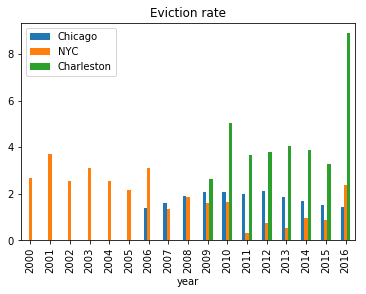

In [107]:
ded.make_bar_plot(year_data)

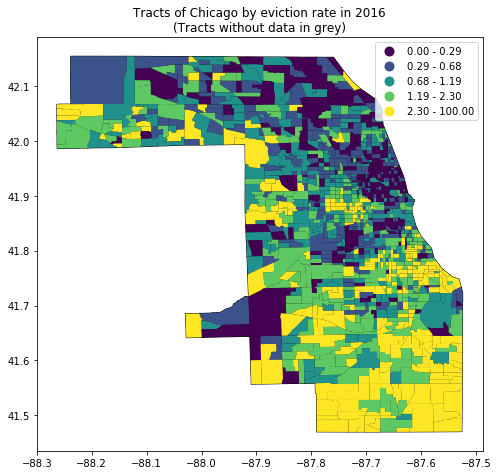

In [67]:
ded.plot_map(chicago_tract_gdf, 'eviction-rate', 2016, 'Chicago')


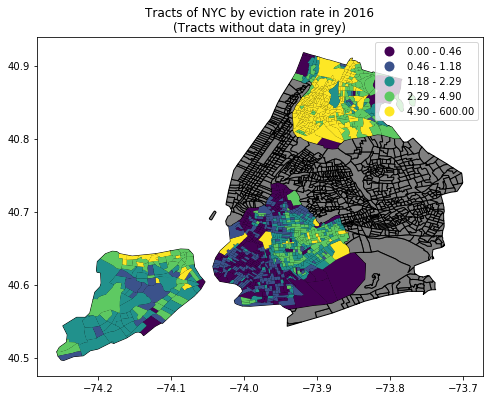

In [80]:
ded.plot_map(nyc_tract_gdf, 'eviction-rate', 2016, 'NYC')

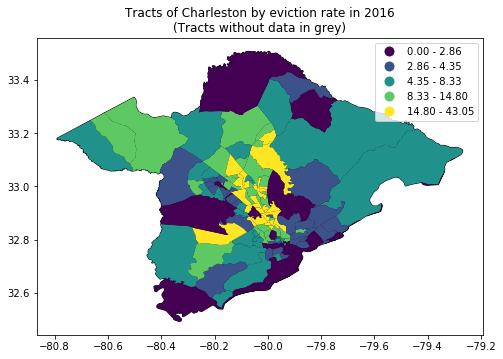

In [74]:
ded.plot_map(charleston_tract_gdf, 'eviction-rate', 2016, 'Charleston')

## Download data for Arkansas, tract level


## Summary
We have data for areas with great eviction data, like Cook County, and data for areas with no eviction data, like Arkansas. We would use the areas with high quuality eviction data to predict eviction in areas like Arkansas.

<Figure size 432x288 with 0 Axes>

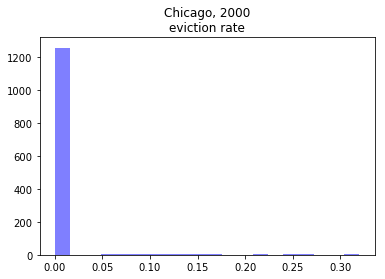

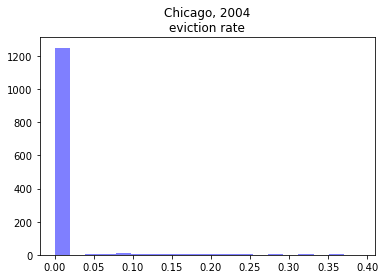

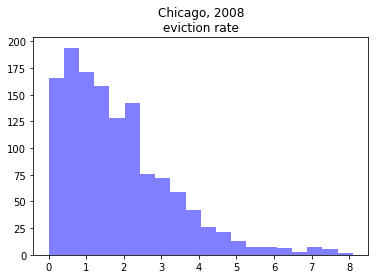

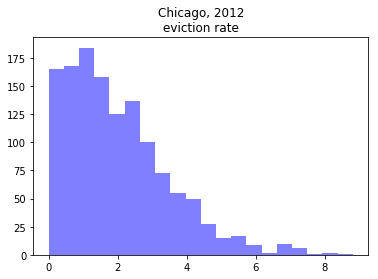

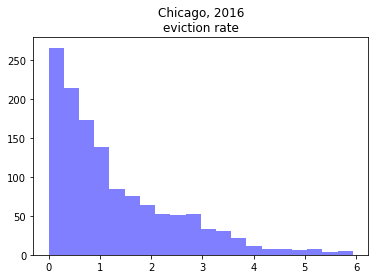

In [108]:
ded.see_histograms(chicago_tract_df, 'Chicago', 'eviction-rate', restrict = (0, 0.99))

<Figure size 432x288 with 0 Axes>

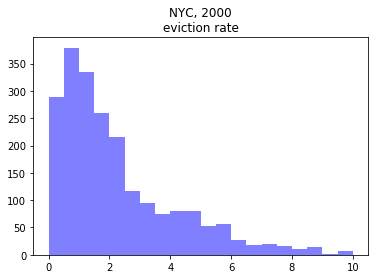

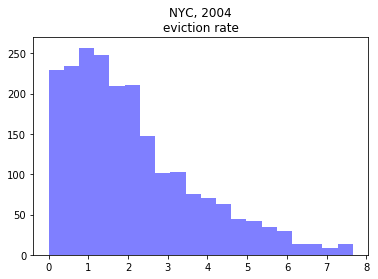

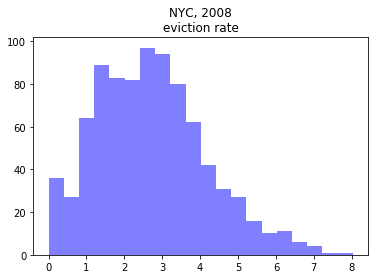

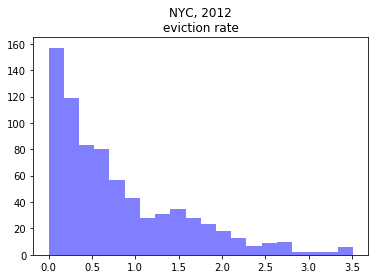

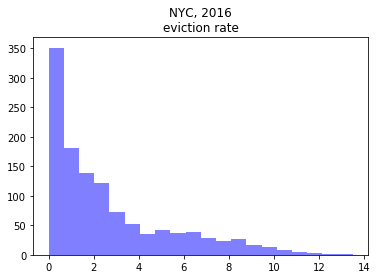

In [109]:
ded.see_histograms(nyc_tract_df, 'NYC', 'eviction-rate', restrict = (0, 0.99))

<Figure size 432x288 with 0 Axes>

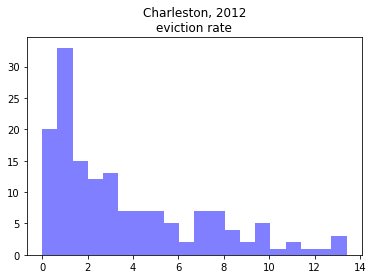

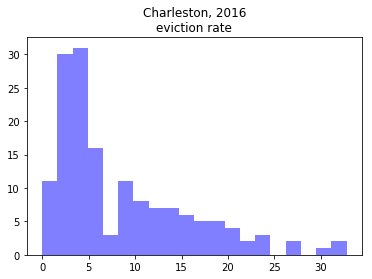

In [110]:
ded.see_histograms(charleston_tract_df, 'Charleston', 'eviction-rate', restrict = (0, 0.99))

In [113]:
chicago_tract_df.loc[chicago_tract_df['year'] > 2007, 'eviction-rate'].quantile(0.90)

3.8